# LeNet

在这里，我们将实现LeNet来识别老师布置的任务CIFAR10。

在开始敲代码之前，明确接下来的几点：

- 我们会使用之前老师之前布置第一次作业中的kfold技术来训练我们的网络，从而得到一个评分
- 由于不知道在cpu上训练的效果（时间长短），先在本地的cpu上训练着，后面再在colab上训练
- 可以考虑使用pytorch的数据增强技术，但这里先不考虑，先在原数据上先训练看看效果

In [1]:
import torch
import torch.nn as nn
import numpy as np
from trainer import Trainer

## 数据加载

In [2]:
train_labels = torch.load('../data/train_labels.pt')
train_data = torch.load('../data/train_data.pt')

## 模型加载

In [3]:
from torchinfo import summary
from models import LeNet
model = LeNet()

In [4]:
model

LeNet(
  (features): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=576, out_features=120, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [5]:
summary(model, input_size=(10,3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
LeNet                                    [10, 10]                  --
├─Sequential: 1-1                        [10, 16, 6, 6]            --
│    └─Conv2d: 2-1                       [10, 6, 32, 32]           456
│    └─ReLU: 2-2                         [10, 6, 32, 32]           --
│    └─MaxPool2d: 2-3                    [10, 6, 16, 16]           --
│    └─Conv2d: 2-4                       [10, 16, 12, 12]          2,416
│    └─ReLU: 2-5                         [10, 16, 12, 12]          --
│    └─MaxPool2d: 2-6                    [10, 16, 6, 6]            --
├─Sequential: 1-2                        [10, 10]                  --
│    └─Linear: 2-7                       [10, 120]                 69,240
│    └─ReLU: 2-8                         [10, 120]                 --
│    └─Linear: 2-9                       [10, 84]                  10,164
│    └─ReLU: 2-10                        [10, 84]                  --
│  

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model.to(device)

LeNet(
  (features): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=576, out_features=120, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)

## 训练参数

In [7]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

trainer = Trainer(
    model, 
    train_data, 
    train_labels, 
    num_epochs=10, 
    batch_size=10, 
    loss_fn=loss_fn, 
    optimizer=optimizer, 
    n_splits=3, 
    is_print=True, 
    print_every=1
)

In [8]:
trainer.train_kfold()

Fold 0
Epoch |  1/10 | Train Loss: 1.8215 | Test Loss: 4.3313
Epoch |  2/10 | Train Loss: 1.6022 | Test Loss: 1.5902
Epoch |  3/10 | Train Loss: 1.4860 | Test Loss: 1.5751
Epoch |  4/10 | Train Loss: 1.4034 | Test Loss: 1.5115
Epoch |  5/10 | Train Loss: 1.3449 | Test Loss: 1.4877
Epoch |  6/10 | Train Loss: 1.2868 | Test Loss: 1.5098
Epoch |  7/10 | Train Loss: 1.2280 | Test Loss: 1.4580
Epoch |  8/10 | Train Loss: 1.1922 | Test Loss: 1.6189
Epoch |  9/10 | Train Loss: 1.1471 | Test Loss: 1.5475
Epoch | 10/10 | Train Loss: 1.1153 | Test Loss: 1.5379
Fold 1
Epoch |  1/10 | Train Loss: 2.0773 | Test Loss: 4.2828
Epoch |  2/10 | Train Loss: 1.6093 | Test Loss: 1.7279
Epoch |  3/10 | Train Loss: 1.4880 | Test Loss: 1.4940
Epoch |  4/10 | Train Loss: 1.4068 | Test Loss: 1.4854
Epoch |  5/10 | Train Loss: 1.3495 | Test Loss: 1.5576
Epoch |  6/10 | Train Loss: 1.2965 | Test Loss: 1.5049
Epoch |  7/10 | Train Loss: 1.2539 | Test Loss: 1.4389
Epoch |  8/10 | Train Loss: 1.2003 | Test Loss: 1.5

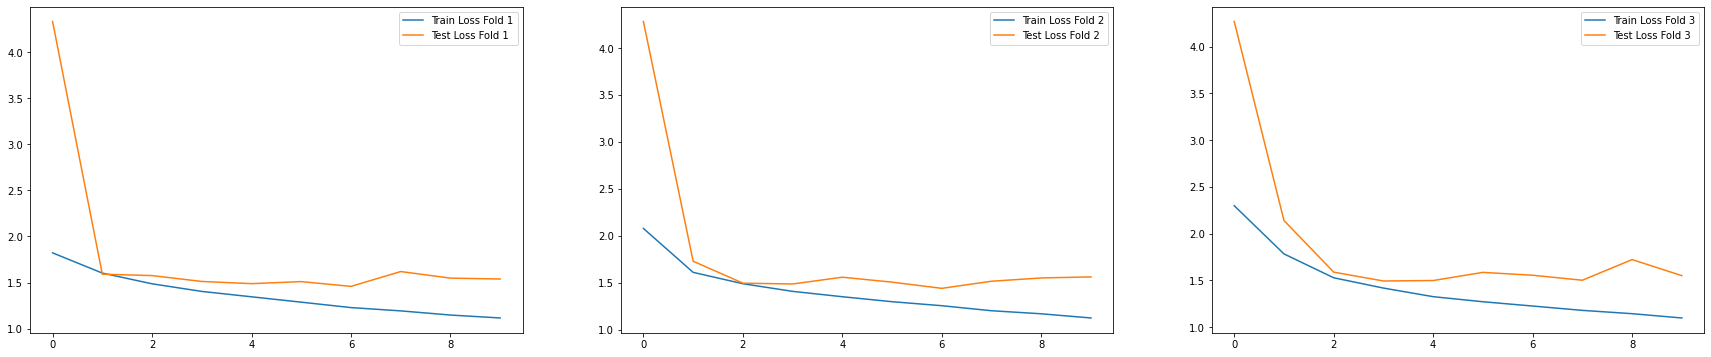

In [9]:
trainer.visualize_kfold()

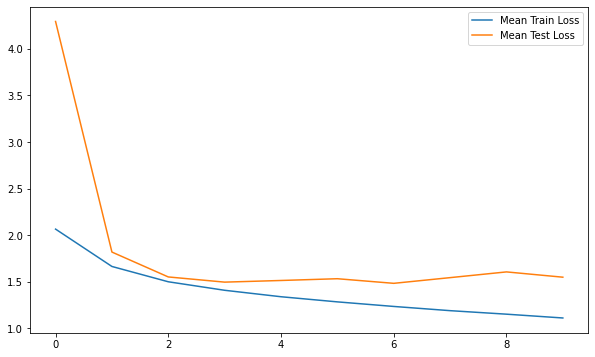

In [10]:
trainer.plot_mean_loss()

In [11]:
# 保存模型
torch.save(model.state_dict(), "model_LeNet.pth")

## 评估训练结果

从这里可以单独开始，不需要从上面开始

In [12]:
import torch
import torch.nn as nn
import numpy as np
test_labels = torch.load('../data/test_labels.pt')
test_data = torch.load('../data/test_data.pt')

In [13]:
from models import LeNet
model = LeNet()
# 在测试集上评估模型的准确率
model.load_state_dict(torch.load("model_LeNet.pth"))

<All keys matched successfully>

In [14]:
model.eval()

with torch.no_grad():
    y_pred = model(test_data)
    y_pred = torch.argmax(y_pred, dim=1)

    accuracy = torch.sum(y_pred == test_labels).item() / len(test_labels)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.49


In [15]:
train_labels = torch.load('../data/train_labels.pt')
train_data = torch.load('../data/train_data.pt')

In [16]:
model.eval()

with torch.no_grad():
    y_pred = model(train_data)
    y_pred = torch.softmax(y_pred, dim=1)  # dim=1表示对每一行进行softmax
    y_pred = torch.argmax(y_pred, dim=1)

    accuracy = torch.sum(y_pred == train_labels).item() / len(train_labels)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.55


可以看到我们这一版的数据是没有经过数据增强或者其它操作，最后导致了模型的过拟合，下一步工作：

- 数据增强
- 数据normalization
- 用简单的模型来训练，看看效果